# Logistic Regression - Predict World Series

## Overview
* Create a Logistic Regression Model that is able to predict if a team won the World Series based off teams statistics from 1905-2018

## Import Libraries

In [78]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [79]:
# Team data from 1905-2018
teams = pd.read_csv('Teams_1905_2018.csv')

## Check Data

In [80]:
# View the first 5 rows of data
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1905,AL,BOS,BOS,NaN,4,153,77,78,74,...,75,0.953,Boston Americans,Huntington Avenue Grounds,468828,101,102,BOS,BOS,BOS
1,1905,NL,BRO,LAD,NaN,8,155,77,48,104,...,101,0.937,Brooklyn Superbas,Washington Park III,227924,93,96,BRO,BRO,BRO
2,1905,NL,BSN,ATL,NaN,7,156,76,51,103,...,89,0.951,Boston Beaneaters,South End Grounds III,150003,98,103,BSN,BSN,BSN
3,1905,AL,CHA,CHW,NaN,2,158,82,92,60,...,95,0.967,Chicago White Sox,South Side Park II,687419,96,93,CHW,CHA,CHA
4,1905,NL,CHN,CHC,NaN,3,155,81,92,61,...,99,0.962,Chicago Cubs,West Side Park II,509900,104,99,CHC,CHN,CHN


In [81]:
# View rows and columns info
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 48 columns):
yearID            2388 non-null int64
lgID              2388 non-null object
teamID            2388 non-null object
franchID          2388 non-null object
divID             1350 non-null object
Rank              2388 non-null int64
G                 2388 non-null int64
Ghome             2388 non-null int64
W                 2388 non-null int64
L                 2388 non-null int64
DivWin            1350 non-null object
WCWin             714 non-null object
LgWin             2388 non-null object
WSWin             2388 non-null object
R                 2388 non-null int64
AB                2388 non-null int64
H                 2388 non-null int64
2B                2388 non-null int64
3B                2388 non-null int64
HR                2388 non-null int64
BB                2388 non-null int64
SO                2372 non-null float64
SB                2388 non-null int64
CS        

In [82]:
# Some statistical information
teams.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,...,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2.388000e+03,2388.000000,2388.000000
mean,1969.880235,3.878978,157.995812,78.992462,78.719430,78.719430,695.942630,5382.857203,1405.743300,244.648241,...,1405.525963,119.805276,511.609715,828.662060,145.814489,144.796064,0.976284,1.471898e+06,100.197236,100.194305
std,32.699850,2.122951,7.353540,3.859485,13.297568,13.228678,106.452818,278.763683,119.737108,46.505251,...,123.157491,52.199869,83.186901,270.610867,50.833443,23.835086,0.007807,9.376833e+05,4.575398,4.636960
min,1905.000000,1.000000,103.000000,47.000000,36.000000,36.000000,329.000000,3493.000000,797.000000,107.000000,...,827.000000,5.000000,228.000000,277.000000,54.000000,64.000000,0.937000,8.092200e+04,88.000000,88.000000
25%,1943.000000,2.000000,155.000000,77.000000,70.000000,70.000000,631.750000,5291.000000,1342.000000,213.000000,...,1337.000000,84.000000,461.000000,592.750000,110.000000,131.000000,0.973000,6.647838e+05,97.000000,97.000000
50%,1975.000000,4.000000,162.000000,81.000000,79.000000,78.000000,696.000000,5456.500000,1409.000000,246.000000,...,1412.000000,126.000000,511.000000,845.500000,135.000000,146.000000,0.978000,1.292952e+06,100.000000,100.000000
75%,1999.000000,5.000000,162.000000,81.000000,89.000000,88.000000,761.000000,5538.000000,1481.000000,279.000000,...,1482.000000,159.000000,566.000000,1028.000000,168.000000,161.000000,0.982000,2.137364e+06,103.000000,103.000000
max,2018.000000,10.000000,165.000000,84.000000,116.000000,120.000000,1067.000000,5781.000000,1783.000000,376.000000,...,1993.000000,258.000000,827.000000,1687.000000,408.000000,217.000000,0.991000,4.483350e+06,129.000000,129.000000


In [83]:
# Column names
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

## Exploratory Data Analysis

### Missing Data

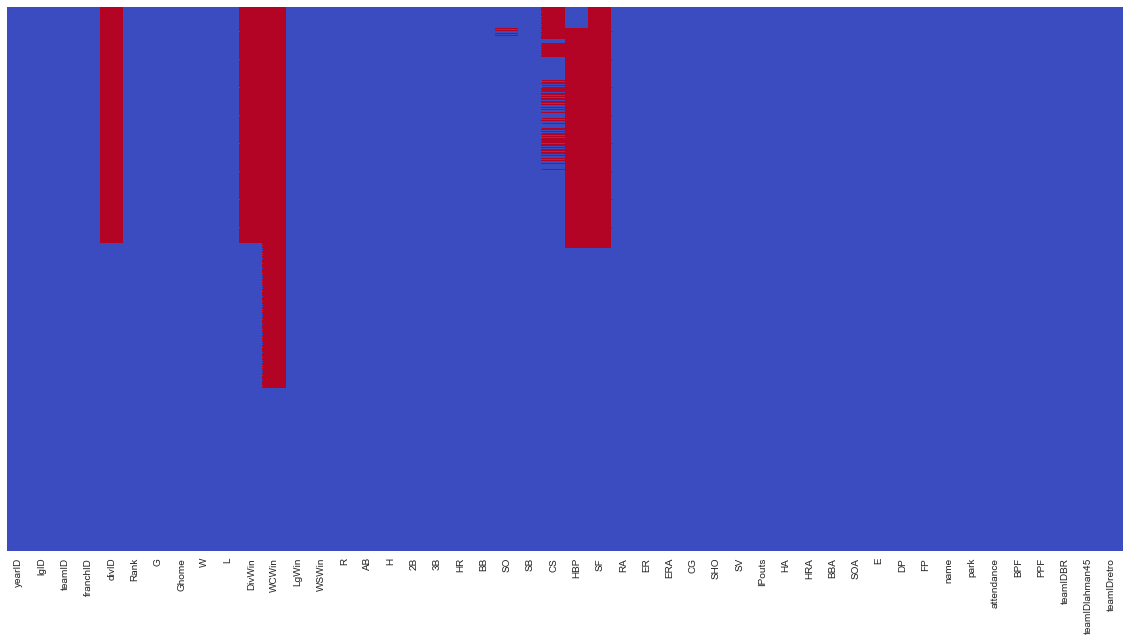

In [84]:
# Seaborn heatmap to see missing data
fig, ax = plt.subplots(figsize = (20,10)) 
sns.heatmap(teams.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm', ax = ax)

### Count Plots

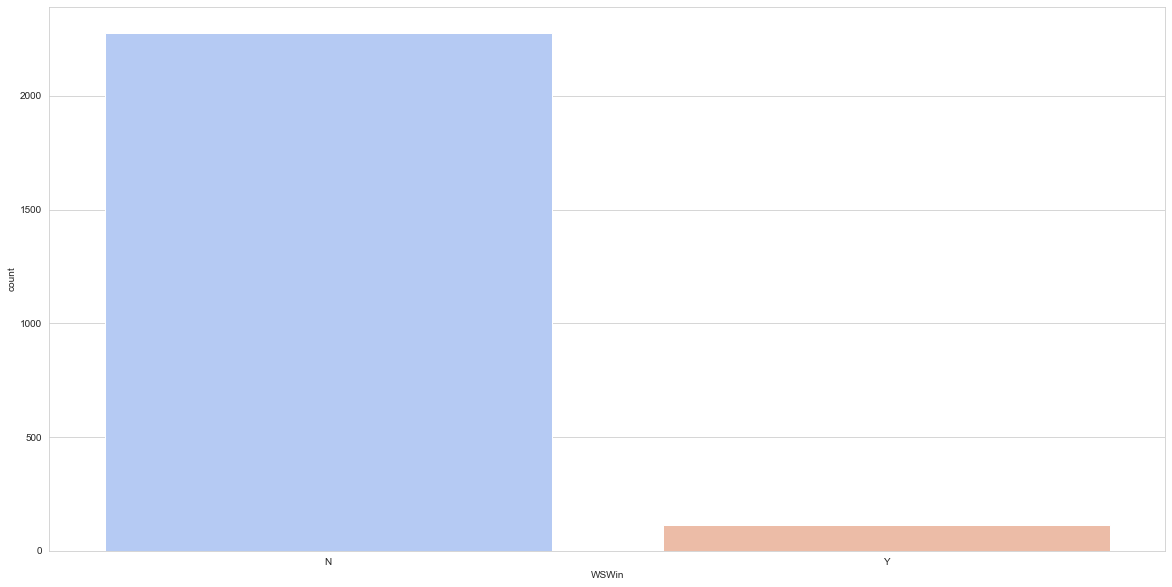

In [85]:
# Count of teams to win and not win World Series from 1905-2018 
fig, ax = plt.subplots(figsize = (20,10)) 
sns.set_style('whitegrid')
sns.countplot(data = teams, x = 'WSWin', palette = 'coolwarm', ax = ax)

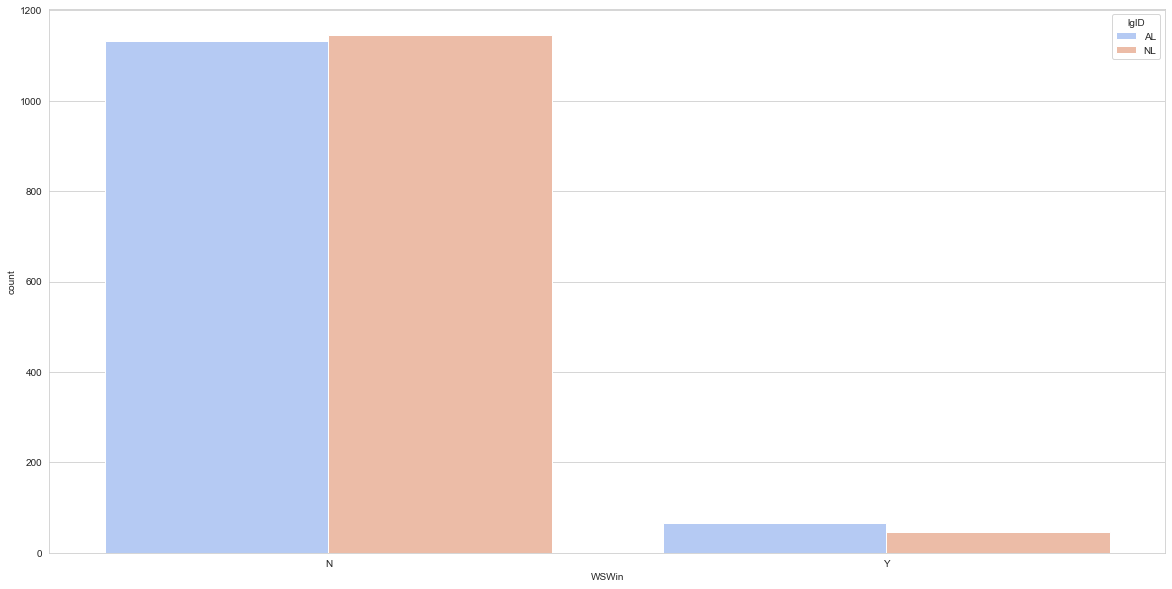

In [86]:
# Count of teams in each league to win and not win World Series from 1905-2018 
fig, ax = plt.subplots(figsize = (20,10)) 
sns.set_style('whitegrid')
sns.countplot(data = teams, x = 'WSWin', hue = 'lgID', palette = 'coolwarm', ax = ax)

### Histogram Plots

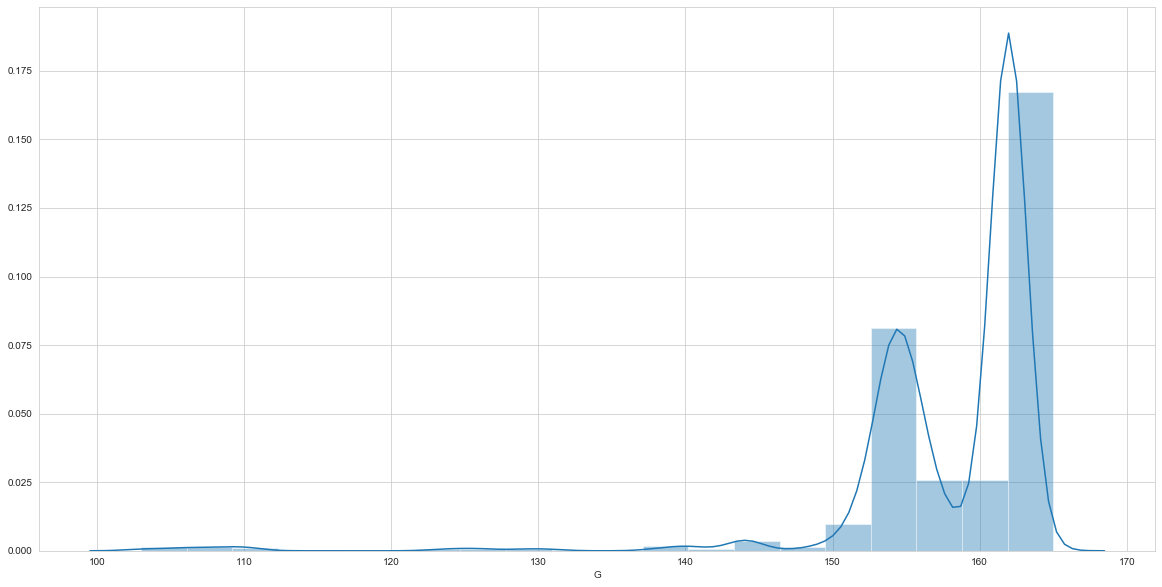

In [87]:
# Histogram plot of number of games teams have played from 1905-2018
fig, ax = plt.subplots(figsize = (20,10)) 
sns.distplot(teams['G'].dropna(), bins = 20, ax = ax)

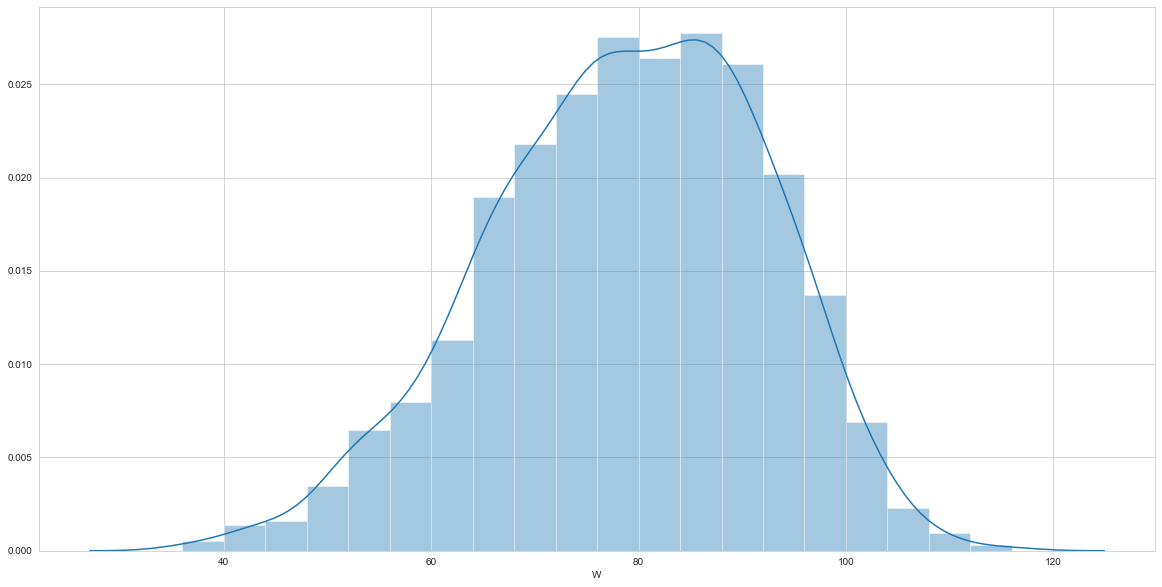

In [88]:
# Histogram plot of number of games teams have won from 1905-2018
fig, ax = plt.subplots(figsize = (20,10)) 
sns.distplot(teams['W'].dropna(), bins = 20, ax = ax)

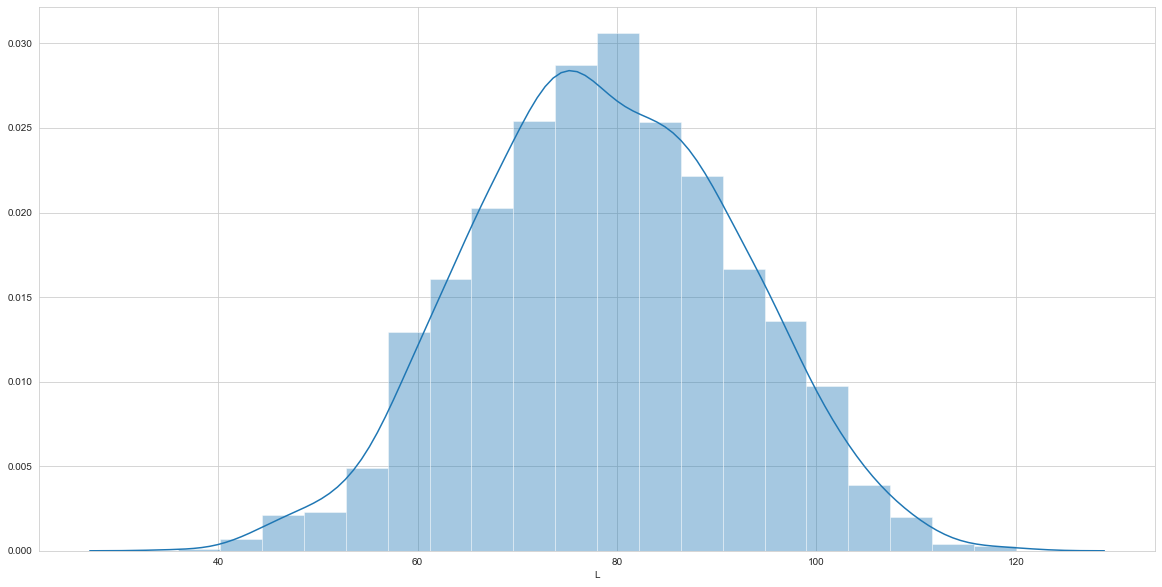

In [89]:
# Histogram plot of number of games teams have lossed from 1905-2018
fig, ax = plt.subplots(figsize = (20,10)) 
sns.distplot(teams['L'].dropna(), bins = 20, ax = ax)

## Data Cleaning

### Columns with Missing Data
* divID (Team's Division) --> drop
    * Team's Division did not start to populate in the data until 1969. Through a quick google search, I discovered divisions were not created until 1969 which, was the year the league expanded. Therefore, I've decided to drop this column as there is no way to accurately fill in the missing data since divisions did not exist before 1969.
* DivWin (Division Winner) --> drop
    * There is no data prior to 1969 for Division Winner due to divisions not being created until 1969. Therefore, like divID, I decided to drop this column from the data set.
* WCWin (Wild Card Winner) --> drop
    * The Wild Card was not created until 1994 therefore, this column will be dropped from the data set. 
* SO (Strike Out by Batters) --> mean of surrounding SO
    * There are only 16 instances where strikeouts were not recorded and that happened in 1911-1912. Therefore, I will average the strikeouts of 1910-1913 to fill in the missing data.
* CS (Caught Stealing) --> mean of all CS
    * The missing caught stealing data will be filled in with the average caught stealing of all rows
* HBP (Batter Hit by Pitch) --> mean of all HBP
    * The missing hit by pitch data will be filled in with the average hit by pitch of all rows
* SF (Sacrifice Flies) --> mean of SF
    * The sacrifice flis data will be filled in with the average sacrifice flies of all rows

### Drop Columns
* divID
* DivWin
* WCWin

In [90]:
# Drop columns with too much missing data
teams.drop(['divID', 'DivWin', 'WCWin'], axis = 1, inplace = True)

# Check columns
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'Rank', 'G', 'Ghome', 'W', 'L',
       'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB',
       'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA',
       'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance',
       'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'],
      dtype='object')

### Mean of Columns
* SO --> mean from 1910-1913
* CS --> mean of entire column
* HBP --> mean of entire column
* SF --> mean of entire column

In [91]:
# Mean of SO from 1910-1913
teams['SO'][83:144].fillna((teams['SO'][83:144].mean()), inplace = True)

# Mean of CS for entire column
teams['CS'].fillna((teams['CS'].mean()), inplace = True)

# Mean of HBP for entire column
teams['HBP'].fillna((teams['HBP'].mean()), inplace = True)

# Mean of SF for entire column
teams['SF'].fillna((teams['SF'].mean()), inplace = True)

### Check for Missing Data

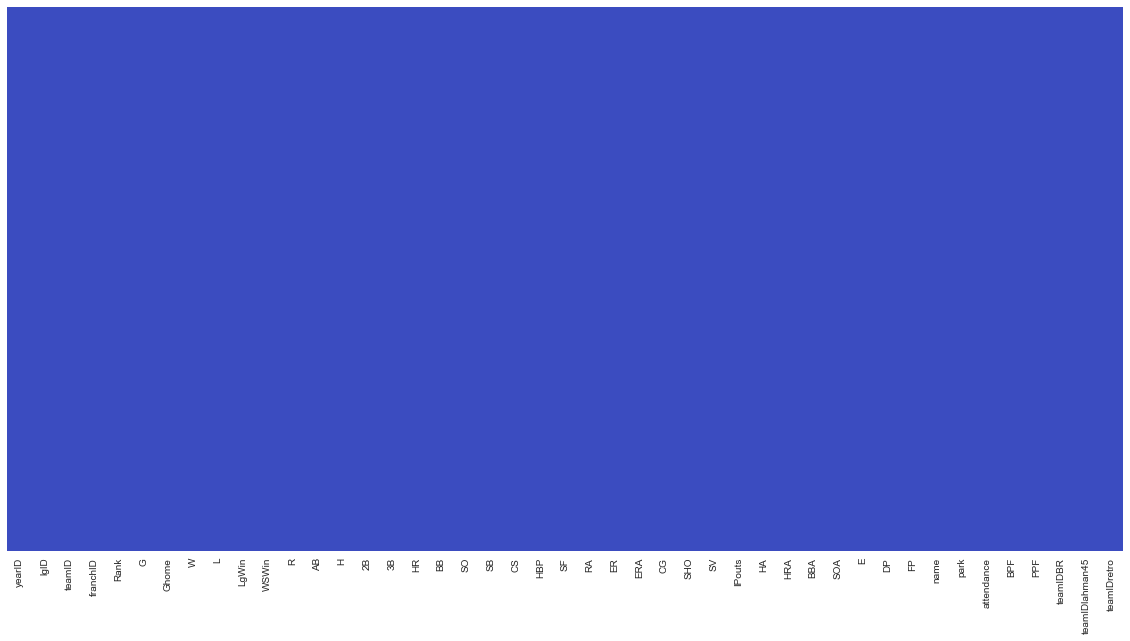

In [92]:
# Seaborn heatmap to see missing data
fig, ax = plt.subplots(figsize = (20,10)) 
sns.heatmap(teams.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm', ax = ax)

### Categorical Features
* Check to see which columns are categorical features
* Convert categorical features that will be included in the logistic regression model
* Drop categorical features that will not be included in the logistic regression model

In [93]:
# Check column type data
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 45 columns):
yearID            2388 non-null int64
lgID              2388 non-null object
teamID            2388 non-null object
franchID          2388 non-null object
Rank              2388 non-null int64
G                 2388 non-null int64
Ghome             2388 non-null int64
W                 2388 non-null int64
L                 2388 non-null int64
LgWin             2388 non-null object
WSWin             2388 non-null object
R                 2388 non-null int64
AB                2388 non-null int64
H                 2388 non-null int64
2B                2388 non-null int64
3B                2388 non-null int64
HR                2388 non-null int64
BB                2388 non-null int64
SO                2388 non-null float64
SB                2388 non-null int64
CS                2388 non-null float64
HBP               2388 non-null float64
SF                2388 non-null float64
RA    

### Convert Categorical Features
* lgID
* franchID
* WSWin

In [94]:
# Convert lgID
lg_ID = pd.get_dummies(teams['lgID'], drop_first = True)

# Conver franchID
franch_ID = pd.get_dummies(teams['franchID'], drop_first = True)

# Convert WSWin
WS_Win = pd.get_dummies(teams['WSWin'], drop_first = True)

# Drop categorical features from dataset
teams.drop(['lgID', 'franchID', 'WSWin'], axis = 1, inplace = True)

# Add converted categorical features to dataset
teams = pd.concat([teams, lg_ID, franch_ID, WS_Win], axis = 1)

# Check columns
teams.columns

Index(['yearID', 'teamID', 'Rank', 'G', 'Ghome', 'W', 'L', 'LgWin', 'R', 'AB',
       'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E',
       'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'NL', 'ARI', 'ATL', 'BAL', 'BOS',
       'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD',
       'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG',
       'STL', 'TBD', 'TEX', 'TOR', 'WSN', 'Y'],
      dtype='object')

### Drop Categorical Features
* teamID
* LgWin
* name
* park
* teamIDBR
* teamIDlahman45
* teamIDretro

In [95]:
# Drop categorical features not included in logistic regression model
teams.drop(['teamID', 'LgWin', 'name', 'park', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'], axis = 1, inplace = True)

# Check columns
teams.columns

Index(['yearID', 'Rank', 'G', 'Ghome', 'W', 'L', 'R', 'AB', 'H', '2B', '3B',
       'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG',
       'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'attendance', 'BPF', 'PPF', 'NL', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC',
       'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL',
       'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL',
       'TBD', 'TEX', 'TOR', 'WSN', 'Y'],
      dtype='object')

In [96]:
teams.head()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,PIT,SDP,SEA,SFG,STL,TBD,TEX,TOR,WSN,Y
0,1905,4,153,77,78,74,579,5049,1179,165,...,0,0,0,0,0,0,0,0,0,0
1,1905,8,155,77,48,104,506,5100,1255,154,...,0,0,0,0,0,0,0,0,0,0
2,1905,7,156,76,51,103,468,5190,1217,148,...,0,0,0,0,0,0,0,0,0,0
3,1905,2,158,82,92,60,612,5114,1213,200,...,0,0,0,0,0,0,0,0,0,0
4,1905,3,155,81,92,61,667,5108,1249,157,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression Model

### X and y Arrays

In [98]:
# Model input
X = teams.drop('Y', axis = 1)

# Model output
y = teams['Y']

### Train Test Split

In [99]:
# Train test split library
from sklearn.model_selection import train_test_split

In [100]:
# Split the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

### Create and Train the Model

In [101]:
# Import logistic regression model
from sklearn.linear_model import LogisticRegression

In [102]:
# Create an instance of the logistic regression model
logmodel = LogisticRegression()

In [103]:
# Train/fit the logistic regression model to the training data
logmodel.fit(X_train, y_train)

C:\Users\washr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict Test Data

In [109]:
#Predict the results of the test data
predictions = logmodel.predict(X_test)

### Evaluate Model

In [105]:
# Import the classification metrics library
from sklearn.metrics import classification_report

# Import confusion metrix library
from sklearn.metrics import confusion_matrix

### Classification Metrics
**Precision** represents the percentage of all instances correctly classified as positive

**Recall** represents the percentage of all instances that were actually positive and classified correctly as positive

**f1 Score** represents a weighted mean of precision and recall

**Support** represents the number of actual occurrences of each classification

**Accuracy** represents overall percentage of correct classification

In [106]:
# Print out the classification metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       916
           1       0.50      0.15      0.23        40

    accuracy                           0.96       956
   macro avg       0.73      0.57      0.60       956
weighted avg       0.94      0.96      0.95       956



### Confusion Matrix
**True Positive** represents predicted true and actually true

**True Negative** represents predicted false and actually false

**False Positive** represents predicted true but actually false

**False Negative** represents predicted false but actually true

In [119]:
# Confusion matrix
confusion_matrix(y_test, predictions)

array([[910,   6],
       [ 34,   6]], dtype=int64)

In [121]:
# Print out the confusion matrix
print('true positive:', confusion_matrix(y_test, predictions)[0,1])
print('true negative:', confusion_matrix(y_test, predictions)[0,0])
print('false positive:', confusion_matrix(y_test, predictions)[1,1])
print('false negative:', confusion_matrix(y_test, predictions)[1,0])

true positive: 6
true negative: 910
false positive: 6
false negative: 34


### Conclusion
* The model has a 96% accuracy score which on the surface looks good but, after looking at the confusion matrix...
    * The model is very good at correctly predicting if a team lost the World Series as it correctly predicted 910 out of 916 teams
    * The model is not very good at correctly predicting if a team won the World Series as it only correctly predicted 6 out of 40 teams